In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import re
import shutil
import numpy as np

In [ ]:
gpus = tf.config.experimental.list_logical_devices('GPU')
strategy = tf.distribute.MirroredStrategy(gpus)

In [ ]:
raw_data = "/content/drive/MyDrive/archive/flowers"

In [ ]:
flowers = ['tulip', 'orchids', 'peonies', 'hydrangeas', 'lilies', 'gardenias', 'garden_roses', 'daisies', 'hibiscus', 'bougainvillea']

for flower in flowers:
    directory = flower
    if not os.path.exists(directory):
        os.mkdir(directory)
    else:
        print(f"The directory '{directory}' already exists.")


In [ ]:
import os

# รายชื่อของดอกไม้
flowers = ['tulip', 'orchids', 'peonies', 'hydrangeas', 'lilies', 'gardenias', 'garden_roses', 'daisies', 'hibiscus', 'bougainvillea']

for flower in flowers:
    folder_path = f"/content/drive/MyDrive/archive/flowers/{flower}"  # เปลี่ยน "ระบุที่อยู่ของโฟลเดอร์" เป็นที่อยู่ที่คุณต้องการ
    os.makedirs(folder_path, exist_ok=True)
    print(f"Flowers {flower} ที่ {folder_path}")


Flowers tulip ที่ /content/drive/MyDrive/archive/flowers/tulip
Flowers orchids ที่ /content/drive/MyDrive/archive/flowers/orchids
Flowers peonies ที่ /content/drive/MyDrive/archive/flowers/peonies
Flowers hydrangeas ที่ /content/drive/MyDrive/archive/flowers/hydrangeas
Flowers lilies ที่ /content/drive/MyDrive/archive/flowers/lilies
Flowers gardenias ที่ /content/drive/MyDrive/archive/flowers/gardenias
Flowers garden_roses ที่ /content/drive/MyDrive/archive/flowers/garden_roses
Flowers daisies ที่ /content/drive/MyDrive/archive/flowers/daisies
Flowers hibiscus ที่ /content/drive/MyDrive/archive/flowers/hibiscus
Flowers bougainvillea ที่ /content/drive/MyDrive/archive/flowers/bougainvillea


In [ ]:
train_data_dir = '/content/drive/MyDrive/archive/flowers'


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# สร้างโมเดล Sequential
model = Sequential()

# เพิ่มเลเยอร์
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# สร้างชุดข้อมูลการฝึก
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 0 images belonging to 10 classes.


In [ ]:
for i in flowers:
    print(os.listdir(f"/content/Flowers/{i}")[:10])

In [ ]:
import cv2
import imghdr

In [ ]:
import os
import re
import shutil

# ระบุที่อยู่ของโฟลเดอร์ที่มีรูปภาพ
raw_data_folder = '/content/drive/MyDrive/archive/flowers'

# สร้างโฟลเดอร์ปลายทาง
destination_base_folder = 'Flowers'

# ลูปที่ดึงข้อมูลจากโฟลเดอร์ raw_data_folder
for folder_name in os.listdir(raw_data_folder):
    # สร้างโฟลเดอร์ปลายทางขึ้นมาใหม่โดยใช้ชื่อโฟลเดอร์จากชื่อโฟลเดอร์เดิม
    destination_folder = os.path.join(destination_base_folder, folder_name)
    os.makedirs(destination_folder, exist_ok=True)

    # ลูปที่ดึงข้อมูลจากโฟลเดอร์รูปภาพ
    for file_name in os.listdir(os.path.join(raw_data_folder, flower)):
        # ทำการคัดลอกไฟล์ภาพไปยังโฟลเดอร์ปลายทาง
        source_path = os.path.join(raw_data_folder, folder_name, file_name)
        destination_path = os.path.join(destination_folder, file_name)
        shutil.copyfile(source_path, destination_path)

print("เสร็จสิ้นการคัดลอกภาพไปยังโฟลเดอร์ปลายทาง")


เสร็จสิ้นการคัดลอกภาพไปยังโฟลเดอร์ปลายทาง


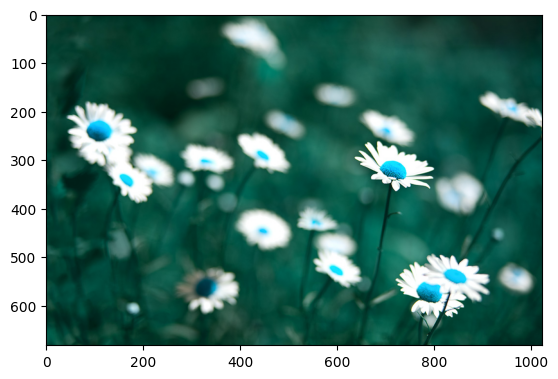

In [ ]:
img = cv2.imread("/content/drive/MyDrive/archive/flowers/daisies_00040.jpg")
plt.imshow(img)
plt.show()

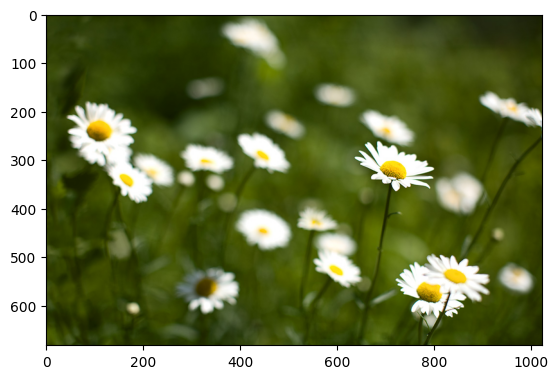

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
tf.data.Dataset??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/archive/')

Found 733 files belonging to 1 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
# สมมติว่า labels เป็นลิสต์ของชื่อโฟลเดอร์
labels = data.class_names

# ให้ผลลัพธ์เป็นสตริงทั้งหมด
labels_str = ', '.join(labels)
print(labels_str)


flowers


In [ ]:
import os

# ระบุที่อยู่ของโฟลเดอร์ที่ต้องการแสดง
folder_path = '/content/drive/MyDrive/archive/flowers/'

# ใช้ os.listdir() เพื่อดึงลิสต์ของไฟล์ในโฟลเดอร์
file_list = os.listdir(folder_path)

# แสดงลิสต์ของไฟล์
for file in file_list:
    print(file)


miniproject Datasci.ipynb
bougainvillea_00002.jpg
bougainvillea_00010.jpg
bougainvillea_00009.jpg
bougainvillea_00003.jpg
bougainvillea_00007.jpg
bougainvillea_00005.jpg
bougainvillea_00004.jpg
bougainvillea_00006.jpg
bougainvillea_00008.jpg
bougainvillea_00012.jpg
bougainvillea_00055.jpg
bougainvillea_00037.jpg
bougainvillea_00043.jpg
bougainvillea_00053.jpg
bougainvillea_00028.jpg
bougainvillea_00024.jpg
bougainvillea_00049.jpg
bougainvillea_00013.jpg
bougainvillea_00040.jpg
bougainvillea_00016.jpg
bougainvillea_00044.jpg
bougainvillea_00054.jpg
bougainvillea_00015.jpg
bougainvillea_00033.jpg
bougainvillea_00027.jpg
bougainvillea_00052.jpg
bougainvillea_00031.jpg
bougainvillea_00039.jpg
bougainvillea_00046.jpg
bougainvillea_00051.jpg
bougainvillea_00045.jpg
bougainvillea_00022.jpg
bougainvillea_00048.jpg
bougainvillea_00014.jpg
bougainvillea_00030.jpg
bougainvillea_00032.jpg
bougainvillea_00047.jpg
bougainvillea_00034.jpg
bougainvillea_00021.jpg
bougainvillea_00050.jpg
bougainvillea_

In [ ]:
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

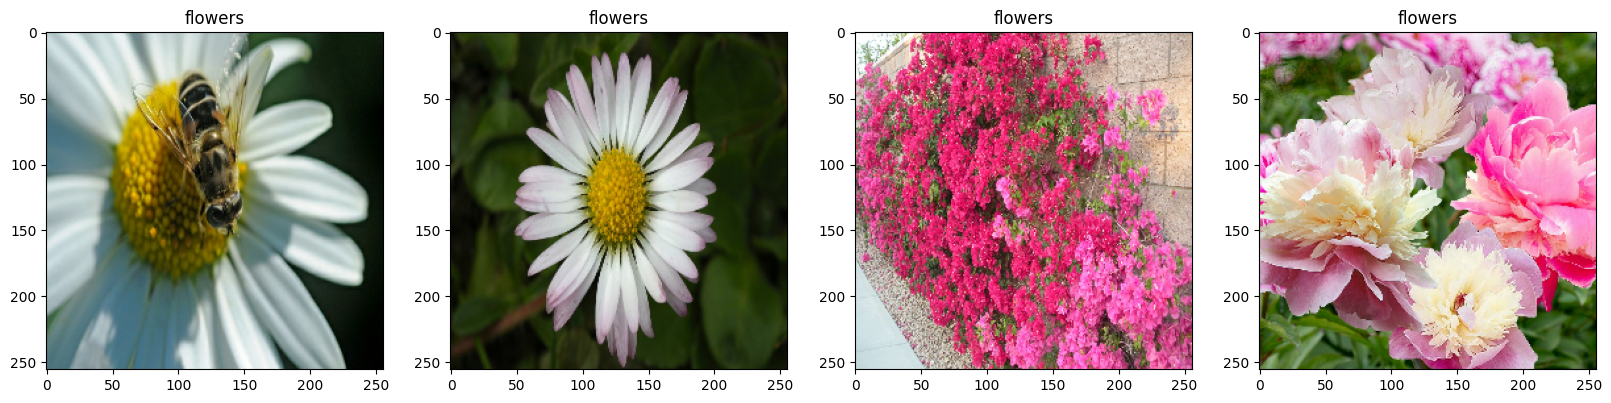

In [ ]:
fig, ax = plt.subplots(ncols= 4, figsize= (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(labels[batch[1][idx]])

In [ ]:
data = data.map(lambda x,y : (x/255, y))

In [ ]:
batch = data.as_numpy_iterator().next()

In [ ]:
print(batch[0].min(), batch[0].max())

0.0 1.0


In [ ]:
print(f"Data is split into {len(data)} batches and Each batch has {len(batch[0])} images.")

Data is split into 23 batches and Each batch has 32 images.


In [ ]:
train_size = int(len(data)* .7)
val_size = int(len(data)* .2) + 1
test_size = int(len(data)* .1)

In [ ]:
train_size + val_size + test_size

23

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
with strategy.scope():
    model = Sequential()

    model.add(Conv2D(filters= 16, kernel_size= (3,3), strides= 1, activation= 'relu', input_shape= (256, 256, 3)))
    model.add(MaxPooling2D())

    model.add(Conv2D(filters= 32, kernel_size= (3,3), strides= 1, activation= 'relu'))
    model.add(MaxPooling2D())

    model.add(Conv2D(filters= 16, kernel_size= (3,3), strides= 1, activation= 'relu'))
    model.add(MaxPooling2D())

    model.add(Flatten())

    model.add(Dense(units= 256, activation= 'relu'))
    model.add(Dense(units= 11, activation= 'softmax'))

    model.compile(optimizer= 'adam', loss= tf.losses.sparse_categorical_crossentropy, metrics = ['accuracy'] )

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
%%time
with strategy.scope():
    hist = model.fit(train, epochs= 20, validation_data= val, callbacks= [tensorboard_callback])

Epoch 1/20
16/16 [==============================] - 71s 4s/step - loss: 0.1438 - accuracy: 0.9902 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
16/16 [==============================] - 66s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
16/16 [==============================] - 65s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
16/16 [==============================] - 65s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
16/16 [==============================] - 71s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
16/16 [==============================] - 85s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
16/16 [==============================] - 64s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.

In [ ]:
pip install pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import pyswarms as ps

In [ ]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
# Perform optimization
best_cost, best_pos = optimizer.optimize(fx.sphere, iters=100)

2024-03-12 13:21:10,355 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.27e-7
2024-03-12 13:21:10,927 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.267342555430617e-07, best pos: [ 0.00034693 -0.00045428]


In [ ]:
optimizer.cost_history
# Obtain the position history
optimizer.pos_history
# Obtain the velocity history
optimizer.velocity_history

[array([[0.30286035, 0.07840339],
        [0.88664091, 0.85782219],
        [0.24312918, 0.79176814],
        [0.32060829, 0.75420685],
        [0.78034504, 0.99656141],
        [0.18788472, 0.44491122],
        [0.08352951, 0.52774034],
        [0.5380839 , 0.33816547],
        [0.28521508, 0.1028582 ],
        [0.53536967, 0.73448733]]),
 array([[ 0.14845959,  0.05535342],
        [ 0.5923286 ,  0.7588506 ],
        [ 0.21243775,  0.69943493],
        [ 0.28854746,  0.67878617],
        [ 0.65486193,  0.71844798],
        [ 0.13137282,  0.23231047],
        [-0.01451607,  0.45277776],
        [ 0.43011766,  0.27390649],
        [ 0.21283592,  0.07850835],
        [ 0.44292208,  0.53314869]]),
 array([[-0.09498583,  0.02683948],
        [ 0.01676029,  0.13683176],
        [ 0.11224404,  0.29193632],
        [ 0.2106678 ,  0.42296092],
        [ 0.14923673,  0.42282187],
        [ 0.00422982, -0.09396521],
        [-0.09004116,  0.26154209],
        [-0.05869491,  0.09856184],
        

In [ ]:
optimizer.mean_pbest_history

[0.8348336242821702,
 0.8348336242821702,
 0.8348336242821702,
 0.7947581097698287,
 0.5501307064665306,
 0.136016281613082,
 0.09162785225443959,
 0.09162785225443959,
 0.09162785225443959,
 0.09162785225443959,
 0.08006485519293204,
 0.07221829189592835,
 0.06768351371064887,
 0.06768351371064887,
 0.06768351371064887,
 0.06605575959260553,
 0.06439079373745464,
 0.045693072474183596,
 0.041834744092532586,
 0.041411958947724675,
 0.04040605634639598,
 0.03715949360536237,
 0.022621899486804202,
 0.022621899486804202,
 0.022621899486804202,
 0.022621899486804202,
 0.022508027752585206,
 0.019575104650251633,
 0.011963405673435793,
 0.011963405673435793,
 0.011874051454034317,
 0.011815065348849378,
 0.007203391037992881,
 0.005593297473356786,
 0.005525026359209404,
 0.005525026359209404,
 0.005404127265737606,
 0.0053815038529665135,
 0.0053815038529665135,
 0.004627505977659785,
 0.003809050681095694,
 0.003809050681095694,
 0.003553965816095157,
 0.003553965816095157,
 0.003539122

In [ ]:
optimizer.mean_neighbor_history

[0.07964495240722175,
 0.07964495240722175,
 0.07964495240722175,
 0.07964495240722175,
 0.07964495240722175,
 0.010553866509076576,
 0.010553866509076576,
 0.010553866509076576,
 0.010553866509076576,
 0.010553866509076576,
 0.009845906525286191,
 0.009845906525286191,
 0.009845906525286191,
 0.009845906525286191,
 0.009845906525286191,
 0.009845906525286191,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.000649075891470892,
 0.0006277326146809891,
 0.0006277326146809891,
 0.00039066975711458767,
 0.00039066975711458767,
 0.00039066975711458767,
 0.00026333830329294957,
 0.00026333830329294957,
 0.00026333830329294957,
 0.00026333830329294957,


In [ ]:
from pyswarms.utils.search import RandomSearch
from pyswarms.utils.functions import single_obj as fx

# Set-up choices for the parameters
options = {
    'c1': (1,5),
    'c2': (6,10),
    'w': (2,5),
    'k': (11, 15),
    'p': 1
}

# Create a RandomSearch object
# n_selection_iters is the number of iterations to run the searcher
# iters is the number of iterations to run the optimizer
g = RandomSearch(ps.single.LocalBestPSO, n_particles=40,
            dimensions=20, options=options, objective_func=fx.sphere,
            iters=10, n_selection_iters=100)

best_score, best_options = g.search()

2024-03-12 13:22:15,934 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 3.4288120375893865, 'c2': 8.198804600727586, 'w': 3.6142817819945634, 'k': 13, 'p': 1}
pyswarms.single.local_best: 100%|██████████|10/10, best_cost=3.74
2024-03-12 13:22:16,006 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 3.738064287231521, best pos: [0.23305261 0.63544427 0.32055933 0.07585737 0.86931346 0.63810354
 0.18993754 0.68460584 0.14468187 0.28214552 0.25963653 0.17541857
 0.05244003 0.0531681  0.92539536 0.40807178 0.17995217 0.44523832
 0.20611641 0.05936061]
2024-03-12 13:22:16,028 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 4.448265782632565, 'c2': 6.099009800519662, 'w': 4.976594687177781, 'k': 11, 'p': 1}
pyswarms.single.local_best: 100%|██████████|10/10, best_cost=3.31
2024-03-12 13:22:16,084 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 3.313575979244064, best pos: [0.57131225 0.06248899 0.63

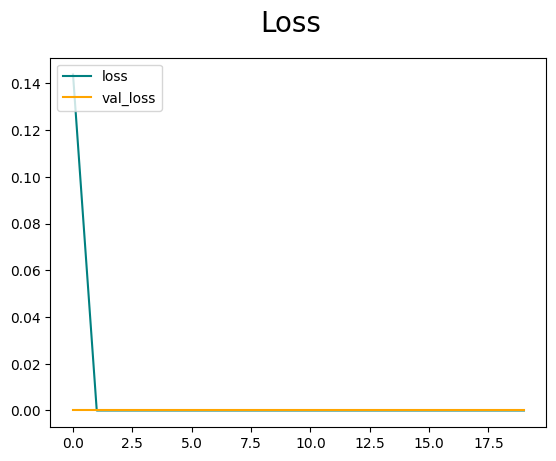

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

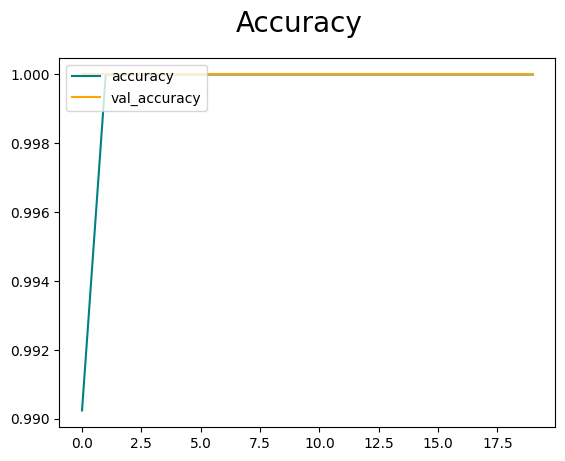

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.metrics import CategoricalAccuracy

In [ ]:
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    yhat = [i.argmax() for i in yhat]
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 651ms/step


In [ ]:
print(f'Accuracy: {round(acc.result().numpy() * 100, 2)} %')

Accuracy: 100.0 %


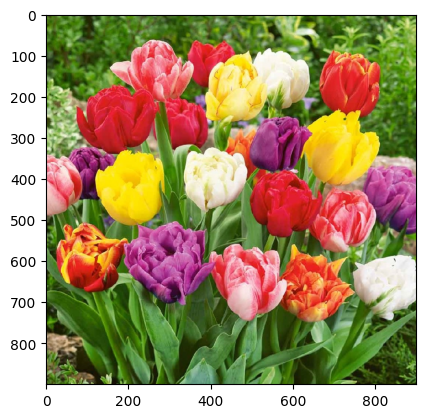

In [ ]:
img = cv2.imread('/content/drive/MyDrive/archive/flowers/tulip_00022.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

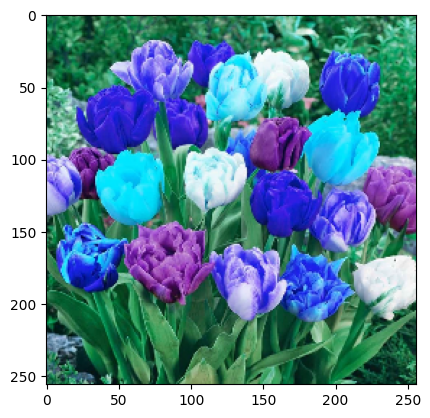

In [ ]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 228ms/step


In [ ]:
labels[yhat.argmax()]

'flowers'

In [ ]:
def predict_flower(model, img_path):
    img = cv2.imread(img_path)
    resize = tf.image.resize(img, (256, 256))
    yhat = model.predict(np.expand_dims(resize/255,0))
    return f'{labels[yhat.argmax()]}'

In [ ]:
predict_flower(model, '/content/drive/MyDrive/archive/flowers/hibiscus_00067.jpg')

1/1 [==============================] - 0s 299ms/step


'flowers'

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('multiclass_flower_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = load_model('multiclass_flower_classifier.h5')

In [ ]:
predict_flower(loaded_model, '/content/drive/MyDrive/archive/flowers/hydrangeas_00036.jpg')

1/1 [==============================] - 0s 117ms/step


'flowers'